In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = "svg"

### 多合一显示：均匀图中图

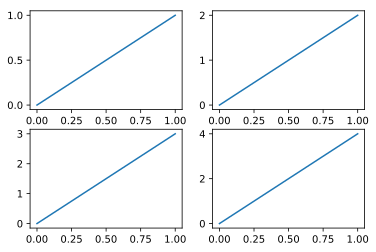

In [3]:
# 创建一个图像窗口
plt.figure(0)

# 创建小图
# 将整个图像窗口分为2行2列

plt.subplot(2,2,1)     # 当前位置为1
plt.plot([0,1],[0,1])  # 在第1个位置创建一个小图
plt.subplot(2,2,2)     # 当前位置为2.
plt.plot([0,1],[0,2])  # 在第2个位置创建一个小图
plt.subplot(223)       # 简写，当前位置为3.
plt.plot([0,1],[0,3])  # 在第3个位置创建一个小图
plt.subplot(224)       # 简写，当前位置为4
plt.plot([0,1],[0,4])  # 在第4个位置创建一个小图

plt.show()  # 展示

### 多合一显示：不均匀图中图

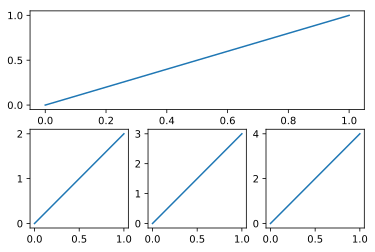

In [4]:
plt.figure(1)

# 将整个图像窗口分为2行1列
plt.subplot(2,1,1)   # 当前位置为1
plt.plot([0,1],[0,1])

# 将整个图像窗口分为2行3列
"""
上一步中使用plt.subplot(2,1,1)将整个图像窗口分为2行1列,第1个小图占用了第1个位置,
也就是整个第1行. 这一步中使用plt.subplot(2,3,4)将整个图像窗口分为2行3列, 于是整
个图像窗口的第1行就变成了3列,也就是成了3个位置, 于是第2行的第1个位置是整个图像
窗口的第4个位置.
"""
plt.subplot(2,3,4)  # 当前位置为4
plt.plot([0,1],[0,2])

plt.subplot(235)    # 当前位置为5
plt.plot([0,1],[0,3])

plt.subplot(236)    # 当前位置为6
plt.plot([0,1],[0,4])

plt.show()  # 展示

### Subplot分格显示

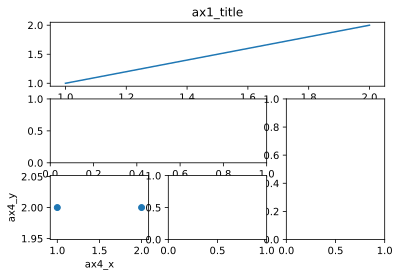

In [5]:
# subplot2grid
plt.figure(3)

#(3,3)表示将整个图像窗口分成3行3列, (0,0)表示从第0行第0列开始作图
#colspan=3表示列的跨度为3, rowspan=1表示行的跨度为1. colspan和rowspan缺省, 默认跨度为1.
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.plot([1, 2], [1, 2])    # 画小图
ax1.set_title('ax1_title')  # 设置小图的标题

ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

ax4.scatter([1, 2], [2, 2]) # ax4中创建一个散点图
ax4.set_xlabel('ax4_x')
ax4.set_ylabel('ax4_y')

plt.show()

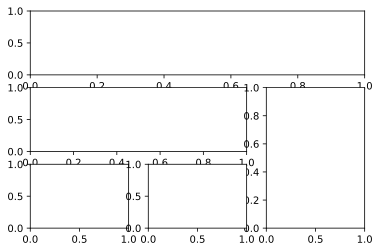

In [7]:
# gridspec
# 先导入
import matplotlib.gridspec as gridspec

plt.figure(4)

gs = gridspec.GridSpec(3,3)

ax6 = plt.subplot(gs[0, :]) # gs[0, :]表示这个图占第0行和所有列
ax7 = plt.subplot(gs[1, :2]) # gs[1, :2]表示这个图占第1行和第2列前的所有列
ax8 = plt.subplot(gs[1:, 2]) # gs[1:, 2]表示这个图占第1行后的所有行和第2列
ax9 = plt.subplot(gs[-1, 0]) # gs[-1, 0]表示这个图占倒数第1行和第0列
ax10 = plt.subplot(gs[-1, -2]) # gs[-1, -2]表示这个图占倒数第1行和倒数第2列.

plt.show()

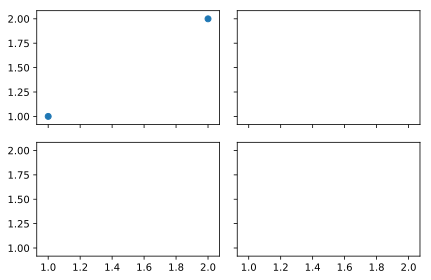

In [8]:
# subplots
# 使用plt.subplots建立一个2行2列的图像窗口，sharex=True表示共享x轴坐标, sharey=True表示共享y轴坐标
# ((ax11, ax12), (ax13, ax14))表示第1行从左至右依次放ax11和ax12, 第2行从左至右依次放ax13和ax14.
f, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax11.scatter([1,2], [1,2]) #ax11绘制一个散点图

plt.tight_layout() # 紧凑显示图像
plt.show()

### 图中图

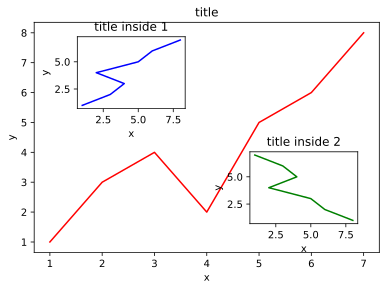

In [11]:
fig = plt.figure(5)

# 创建数据
x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,6,8]

# 绘制大图

# 首先确定大图左下角的位置以及宽高
# 4个值都是占整个figure坐标系的百分比。假设figure的大小是10x10
# 那么大图就被包含在由(1, 1)开始，宽8，高8的坐标系内。
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

# 将大图坐标系添加到figure中
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(x, y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')


# 绘制左上角小图
left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(y, x, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')

# 绘制右下角的小图
plt.axes([0.6, 0.2, 0.25, 0.25])
plt.plot(y[::-1], x, 'g') # 注意对y进行了逆序处理
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

plt.show()

### 次坐标轴

<Figure size 432x288 with 0 Axes>

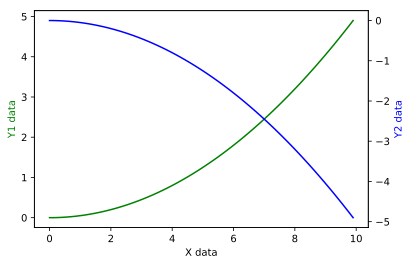

In [13]:
# 同个图上两个Y坐标轴
plt.figure(6)

x = np.arange(0, 10, 0.1)

y1 = 0.05 * x**2
y2 = -1 * y1

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 生成如同镜面效果后的ax2

ax1.plot(x, y1, 'g-')   # green, solid line
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

ax2.plot(x, y2, 'b-') # blue
ax2.set_ylabel('Y2 data', color='b')

plt.show()

### Animation动画

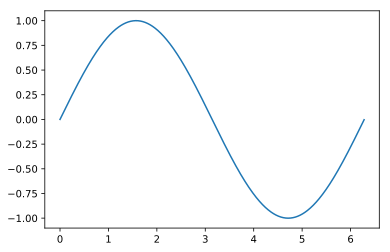

In [16]:
from matplotlib import animation

fig, ax = plt.subplots()

# 一个0~2π内的正弦曲线
x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

# 自定义动画函数animate，用来更新每一帧上各个x对应的y坐标值，参数表示第i帧
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))
    return line,

# 构造开始帧函数init
def init():
    line.set_ydata(np.sin(x))
    return line,

"""
fig：进行动画绘制的figure
func：自定义动画函数，即传入刚定义的函数animate
frames：动画长度，一次循环包含的帧数
init_func：自定义开始帧，即传入刚定义的函数init
interval：更新频率，以ms计
blit：选择更新所有点，还是仅更新产生变化的点。应选择True，但mac用户请选择False，否则无法显示动画
"""

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=20,
                              blit=False)

plt.show()